In [ ]:
# Load the file into your Python environment

!pip install biopython     #installing biopython
import pandas as pd         #import pandas
cancerdata=pd.read_csv("/content/mini survey lung cancer.csv")   #loading the file and naming it


In [ ]:
cancerdata

,GENDER,AGE,SMOKING,ANXIETY,CHRONIC DISEASE,ALCOHOL CONSUMING,SHORTNESS OF BREATH,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,1,2,2,2,YES
1,M,74,2,1,2,1,2,2,YES
2,F,59,1,1,1,1,2,2,NO
3,M,63,2,2,1,2,1,2,NO
4,F,63,1,1,1,1,2,1,NO
...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,2,2,2,1,YES
305,M,70,2,1,1,2,2,2,YES
306,M,58,2,1,1,2,1,2,YES
307,M,67,2,2,1,2,2,2,YES


In [ ]:
#For the variables with the 2/1 scores, replace all the 2 with a Yes and 1 with a No
df = cancerdata.replace({1: "No", 2: "Yes"})

In [ ]:
df

,GENDER,AGE,SMOKING,ANXIETY,CHRONIC DISEASE,ALCOHOL CONSUMING,SHORTNESS OF BREATH,CHEST PAIN,LUNG_CANCER
0,M,69,No,Yes,No,Yes,Yes,Yes,YES
1,M,74,Yes,No,Yes,No,Yes,Yes,YES
2,F,59,No,No,No,No,Yes,Yes,NO
3,M,63,Yes,Yes,No,Yes,No,Yes,NO
4,F,63,No,No,No,No,Yes,No,NO
...,...,...,...,...,...,...,...,...,...
304,F,56,No,No,Yes,Yes,Yes,No,YES
305,M,70,Yes,No,No,Yes,Yes,Yes,YES
306,M,58,Yes,No,No,Yes,No,Yes,YES
307,M,67,Yes,Yes,No,Yes,Yes,Yes,YES


In [ ]:
#Let’s categorize the AGE group as well. For all individuals less than 65 years old, assign
#them as “Middle” and all individuals greater than or equal to 65 as “Old”. (20pts)

#I created a new column in the dataframe called age_group assigned the Old and Middle values to the approprtiate positions
#then updated the age column with the age_group identifiers
df['age_group'] = 'Middle'
df.loc[df['AGE'] >= 65, "age_group"] = 'Old'
age_grouplist=df["age_group"]
df["AGE"]=age_grouplist
df=df.drop(['age_group'], axis=1)

In [ ]:
#printing out the new updated df with the AGE column updated
df

,GENDER,AGE,SMOKING,ANXIETY,CHRONIC DISEASE,ALCOHOL CONSUMING,SHORTNESS OF BREATH,CHEST PAIN,LUNG_CANCER
0,M,Old,No,Yes,No,Yes,Yes,Yes,YES
1,M,Old,Yes,No,Yes,No,Yes,Yes,YES
2,F,Middle,No,No,No,No,Yes,Yes,NO
3,M,Middle,Yes,Yes,No,Yes,No,Yes,NO
4,F,Middle,No,No,No,No,Yes,No,NO
...,...,...,...,...,...,...,...,...,...
304,F,Middle,No,No,Yes,Yes,Yes,No,YES
305,M,Old,Yes,No,No,Yes,Yes,Yes,YES
306,M,Middle,Yes,No,No,Yes,No,Yes,YES
307,M,Old,Yes,Yes,No,Yes,Yes,Yes,YES


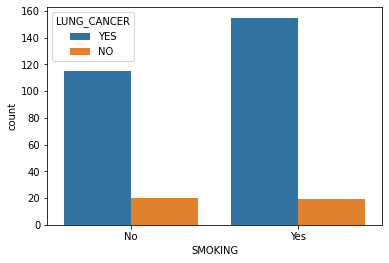

In [ ]:
#Use a bar plot to show whether smokers have a higher probability of of getting cancer
import seaborn as sns

sns.countplot(x='SMOKING', hue='LUNG_CANCER', data=df)

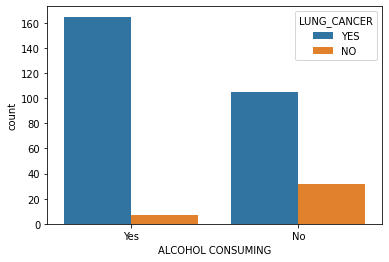

In [ ]:
# Do the same for alcohol drinking
sns.countplot(x='ALCOHOL CONSUMING', hue='LUNG_CANCER', data=df)

In [ ]:
#turning all the categorical values into the numerical (0's and 1's) so it can pass for Cross vaidation testing
df=pd.get_dummies(df, drop_first= True)
df

,GENDER_M,AGE_Old,SMOKING_Yes,ANXIETY_Yes,CHRONIC DISEASE_Yes,ALCOHOL CONSUMING_Yes,SHORTNESS OF BREATH_Yes,CHEST PAIN_Yes,LUNG_CANCER_YES
0,1,1,0,1,0,1,1,1,1
1,1,1,1,0,1,0,1,1,1
2,0,0,0,0,0,0,1,1,0
3,1,0,1,1,0,1,0,1,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
304,0,0,0,0,1,1,1,0,1
305,1,1,1,0,0,1,1,1,1
306,1,0,1,0,0,1,0,1,1
307,1,1,1,1,0,1,1,1,1


In [ ]:
#download the packages
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
#Randomly split the data into 20% testing and 80% training
x = np.array(df[["GENDER_M","AGE_Old","SMOKING_Yes","ANXIETY_Yes","CHRONIC DISEASE_Yes","ALCOHOL CONSUMING_Yes","SHORTNESS OF BREATH_Yes","CHEST PAIN_Yes"]])
y = np.array(df.LUNG_CANCER_YES)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


In [ ]:
#Perform 5x cross validation on training ONLY
clf_train = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)

In [ ]:
results_train = clf_train.predict(X_train)
confusion_matrix(results_train, y_train)
clf_train.score(X_train,y_train)

0.8704453441295547

In [ ]:
k_folds = KFold(n_splits = 5)
scores_train = cross_val_score(clf_train, x, y, cv = k_folds)

print("Cross Validation Scores: ", scores_train)
print("Average CV Score: ", scores_train.mean())
print("Number of CV Scores used in Average: ", len(scores_train))

Cross Validation Scores:  [0.74193548 0.98387097 0.87096774 0.93548387 0.83606557]
Average CV Score:  0.8736647276573242
Number of CV Scores used in Average:  5


In [ ]:
#Test your model on the 20% test data
clf_test = DecisionTreeClassifier(max_depth=2).fit(X_test,y_test)

results_test = clf_test.predict(X_test)
confusion_matrix(results_test, y_test)
clf_test.score(X_test,y_test)

0.8870967741935484

In [ ]:
k_folds = KFold(n_splits = 5)

scores_test = cross_val_score(clf_test, x, y, cv = k_folds)

print("Cross Validation Scores: ", scores_test)
print("Average CV Score: ", scores_test.mean())
print("Number of CV Scores used in Average: ", len(scores_test))

Cross Validation Scores:  [0.74193548 0.98387097 0.87096774 0.93548387 0.83606557]
Average CV Score:  0.8736647276573242
Number of CV Scores used in Average:  5


In [ ]:
#Compare and discuss the results from cross validation and the your final test

#Cross-validation is a technique used to evaluate the performance of a machine learning model by training and testing the model on different subsets of the data.
#This is used to to estimate the model's generalization performance, which is its ability to make accurate predictions on new, unseen data.
#In this case, the cross-validation scores are pretty good, with an average score of both the test and training sets being around 0.87.
#This suggests that the model is performing well and is likely to generalize well to new data.
#Based on the cross-validation scores, I would be fairly confident that the model will correctly predict new data.
